In [1019]:
from skimage import io #Libreria para importar imagen desde el directorio en uso o en su defecto se pone la direccion completa del archivo
from skimage import img_as_float #Transformar una imagen a valores float entre 0 y 1
from skimage.color import rgb2gray #Pasar una imagen a escala de grises
import matplotlib.pyplot as plt #Importar libreria para graficos
from skimage import filters #filtros, por ahora usamos triangle
from skimage import morphology #Para dilation y erosion, y sus derivados
import numpy as np #logical not 
import scipy.ndimage as ndi
%matplotlib inline 
#para ver figuras, muy importante
import skimage.feature as skfeat #libreria con enfoque en detectar figuras
from math import sqrt #para la raiz cuadrada, en caso de usar algoritmos log o dog

In [1092]:
img = io.imread("F.tif")
img_float = img_as_float(img)
img_gray = rgb2gray (img_float)


Text(0.5,1,'Original in grey')

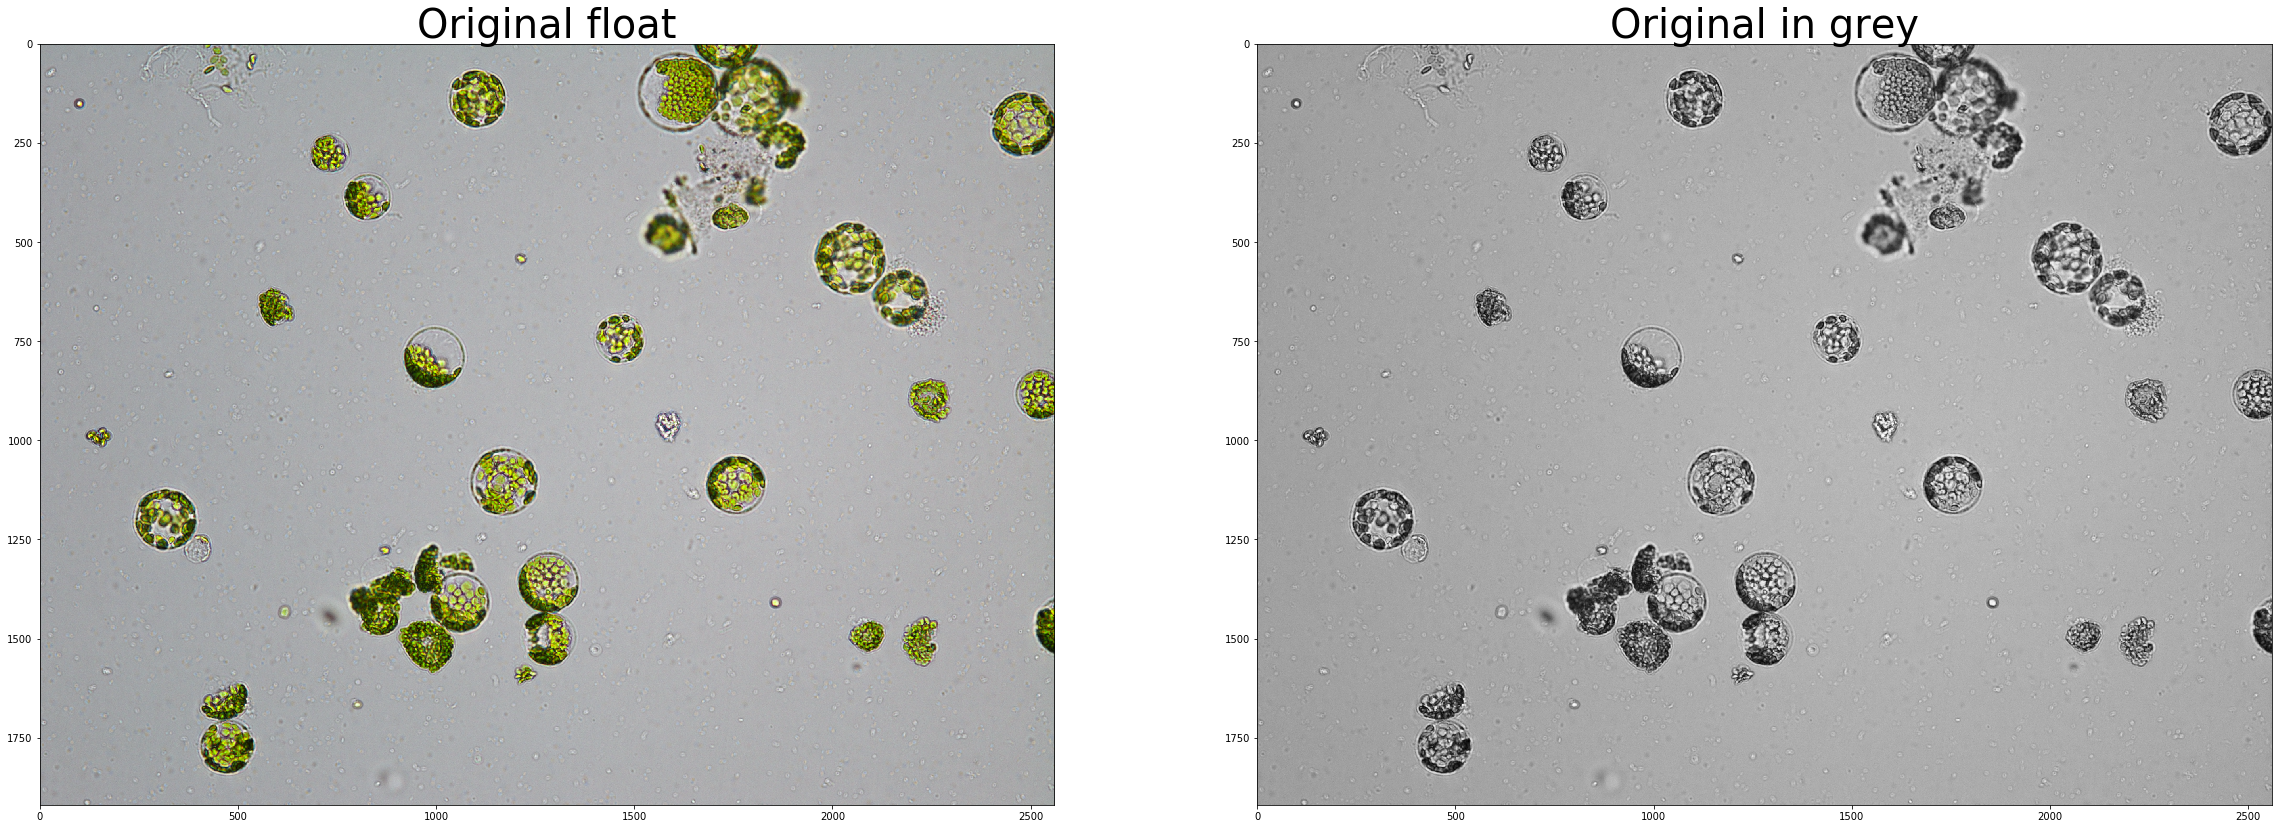

In [1093]:
ig, ax = plt.subplots(ncols = 2, figsize=(40, 40))

ax[0].imshow(img_float, cmap='gray')
ax[0].set_title('Original float', fontsize=40)
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Original in grey', fontsize=40)

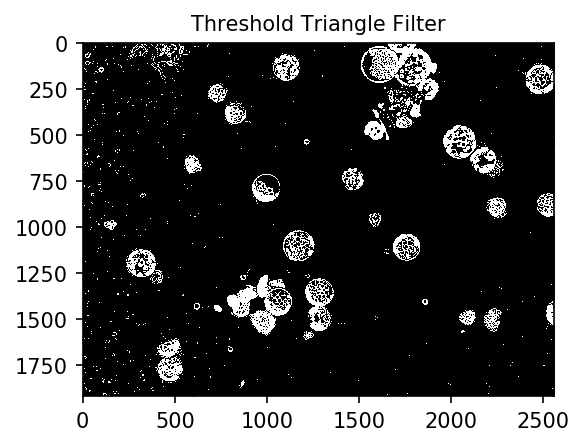

In [1094]:
thres = filters.threshold_triangle (img_gray)

img_thres= img_gray < thres

plt.figure(figsize=(4, 4), dpi=150)
plt.title('Threshold Triangle Filter', fontsize=10)
io.imshow(img_thres, cmap = 'gray')



Text(0.5,1,'Recover important objects')

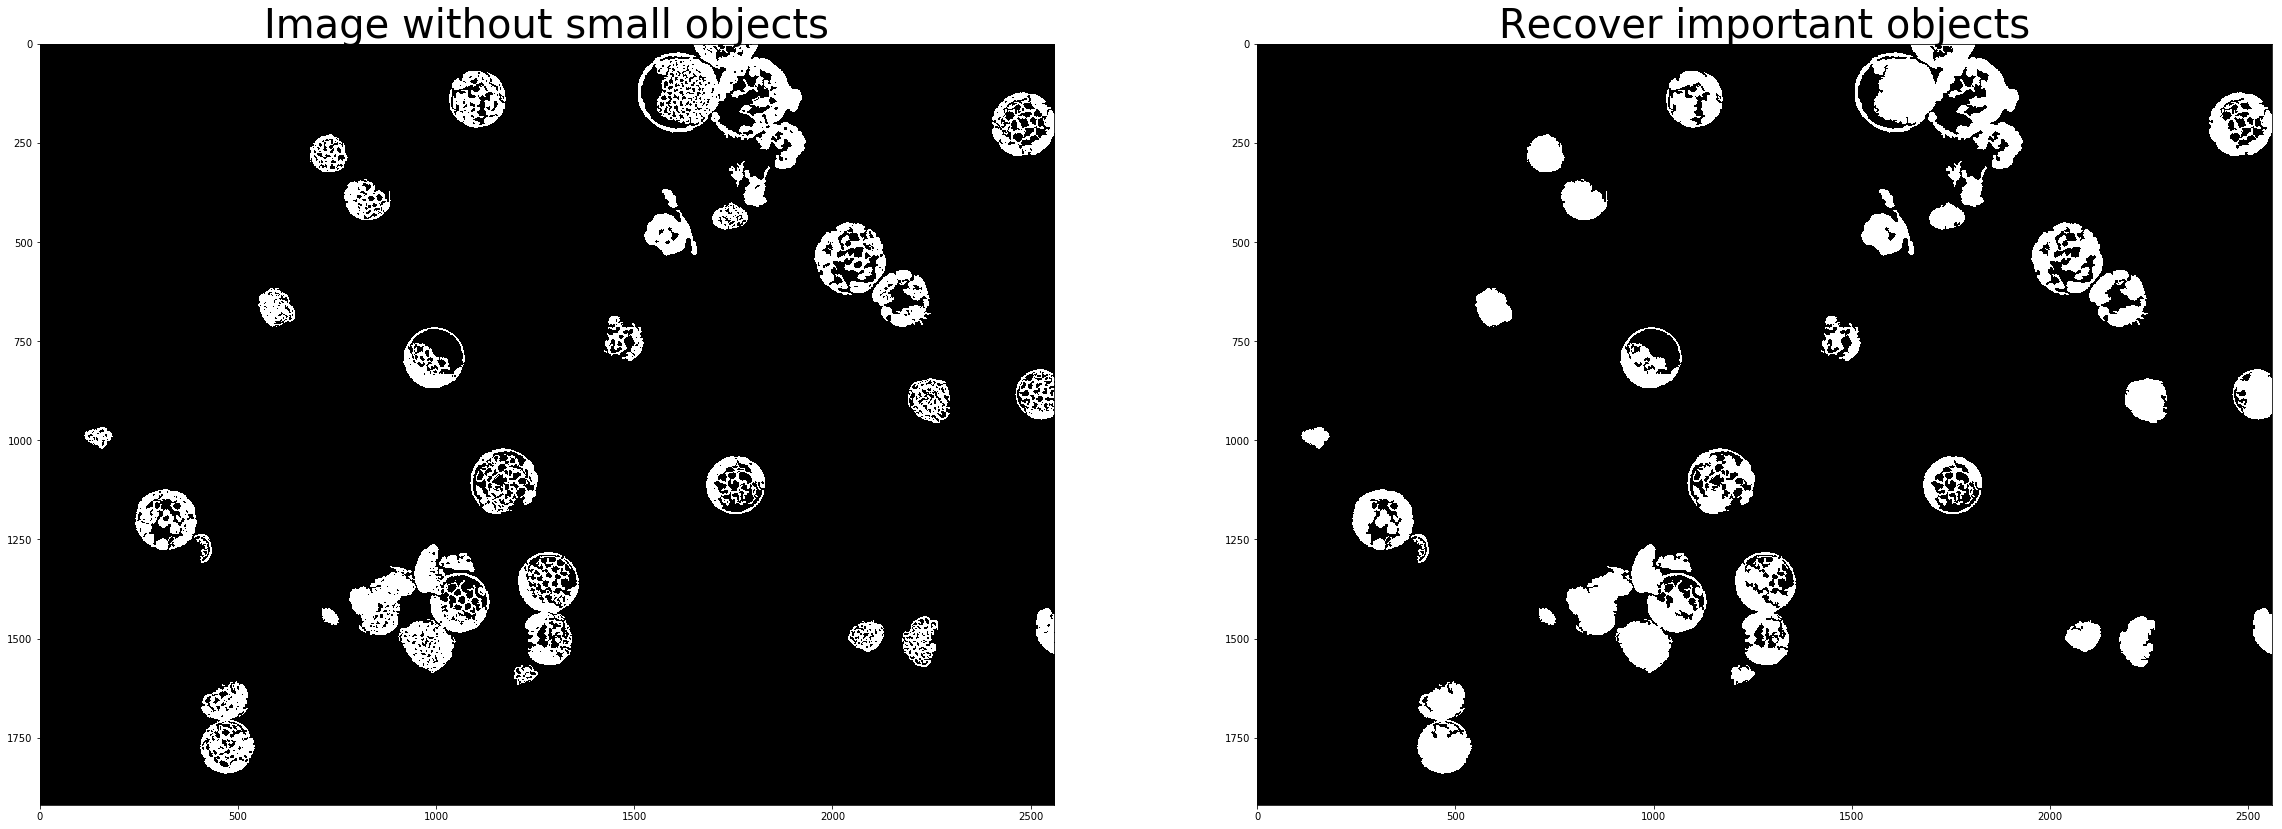

In [1095]:
img_sobj = morphology.remove_small_objects(img_thres,min_size=1000)#300
img_addobj = np.logical_not(morphology.remove_small_objects(np.logical_not(img_sobj),  min_size=300))

ig, ax = plt.subplots(ncols = 2, figsize=(40, 40))

ax[0].imshow(img_sobj, cmap='gray')
ax[0].set_title('Image without small objects', fontsize=40)
ax[1].imshow(img_addobj, cmap='gray')
ax[1].set_title('Recover important objects', fontsize=40)


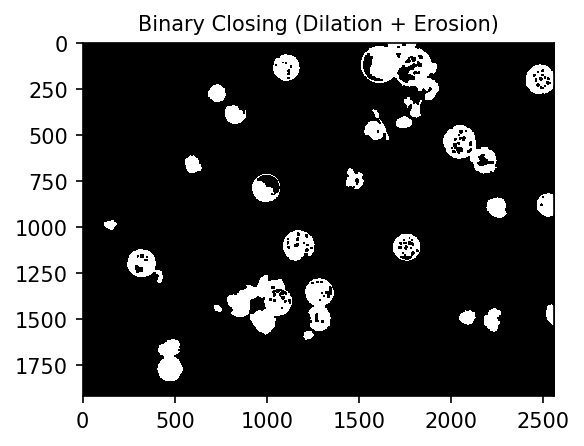

In [1096]:
img_closing = morphology.binary_closing (img_addobj, selem = np.ones((10,10)))
plt.figure(figsize=(4, 4), dpi=150)
plt.title('Binary Closing (Dilation + Erosion)', fontsize=10)
io.imshow(img_closing, cmap = 'gray')


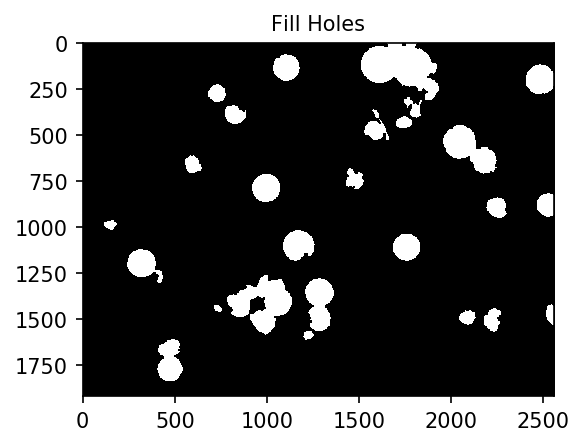

In [1097]:
img_fill=ndi.binary_fill_holes(img_closing).astype(float)
plt.figure(figsize=(4, 4), dpi=150)
plt.title('Fill Holes', fontsize=10)
io.imshow(img_fill, cmap = 'gray')

In [1098]:
a = skfeat.blob_doh (img_fill,min_sigma= 60.0, max_sigma=120.0, num_sigma=10, overlap=0.25)#default values 40, 120, 10 y 0.4
#Hay varias aproximaciones para lograr lo mismo: blob_log(), blob_dog() y blob_doh. Los tres algoritmos hacen esencialmente lo mismo pero en nuestro caso la mas eficiente es la ultima.
#Debido a que nuestra imagen esta previamente segmentada apropiadamente. Si se quiere mas rigurosidad aplicar los otros algoritmos

#min_sigma mantener bajo para detectar celulas pequenas
#max_sigma mantener alto para detectar celulas grandes
#num_sigma mantener asi por ahora
#overlap, valor entre 0 y 1 que corresponde a un umbral para eliminar objetos que se sobrelapan


In [1099]:
# Identify regions of interest; in this case, the protoplasts

rois = []
new_a =[]
for i in range(len(a)):
    x = a[i,0]
    y = a[i,1]
    #r = sqrt(2)*a[i,2]
    r = a[i,2]
    x1 = int(round(x-r-8))
    x2 = int(round(x+r+8))
    y1 = int(round(y-r-8))
    y2 = int(round(y+r+8))
    
    if (x1>=0)&(x2<=img_float.shape[0])&(y1>=0)&(y2<=img_float.shape[1]):
        rois.append(img_float[x1:x2,y1:y2])
        new_a.append ([x,y,r])
    
               


In [1100]:
print(a) #matriz de lo elementos identificados cordenada x, cordenada y y sigma (medida de radio), corresponde a un array
#new_a.shape numero de filas y columnas

#a corresponde a un array de arrays


[[ 1731.           466.           113.33333333]
 [ 1564.          2141.            66.66666667]
 [ 1471.          2541.            60.        ]
 [ 1433.          2157.            60.        ]
 [ 1379.          1021.           120.        ]
 [ 1356.          1281.            80.        ]
 [ 1199.           316.            80.        ]
 [ 1112.          1754.            80.        ]
 [ 1098.          1160.            93.33333333]
 [  990.           146.            60.        ]
 [  896.          2247.            60.        ]
 [  882.          2519.            60.        ]
 [  790.           991.            80.        ]
 [  745.          1469.            60.        ]
 [  666.           594.            60.        ]
 [  648.          2186.            80.        ]
 [  536.          2035.            93.33333333]
 [  476.          1587.            60.        ]
 [  398.           821.            60.        ]
 [  278.           724.            60.        ]
 [  202.          2479.            80.  

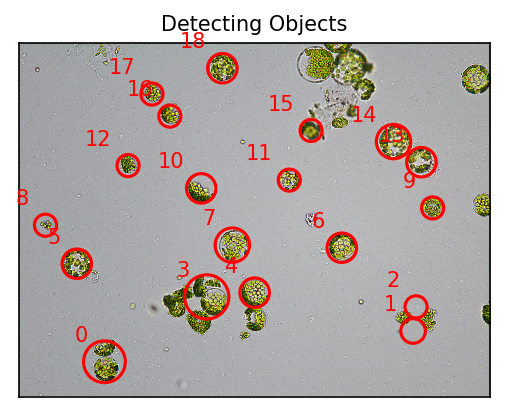

In [1101]:
plt.figure(figsize=(4,4), dpi=150)
plt.title('Detecting Objects', fontsize=10)
io.imshow(img_float) #usar imagen original
for i in range(len(new_a)):
    circle = plt.Circle((new_a[i][1], new_a[i][0]), new_a[i][2], color='r', fill=False , lw=1.5)#cada una de las coordenadas y el radio del circulo
    fig = plt.gcf()#Para trabajar sobre los ejes y figura de arriba
    ax = fig.gca()#All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance).
    ax.add_artist(circle)#agrega el circulo a la imagen sobre la que se trabaja
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.annotate(i, xy=(new_a[i][1], new_a[i][0]), xytext=(-8, 8),
                     textcoords='offset points', ha='right', va='bottom',
                     color='red')


In [1102]:
img_float.shape #fila, columna y canales (3 en este caso debido a que es una imagen rgb)



(1920, 2560, 3)

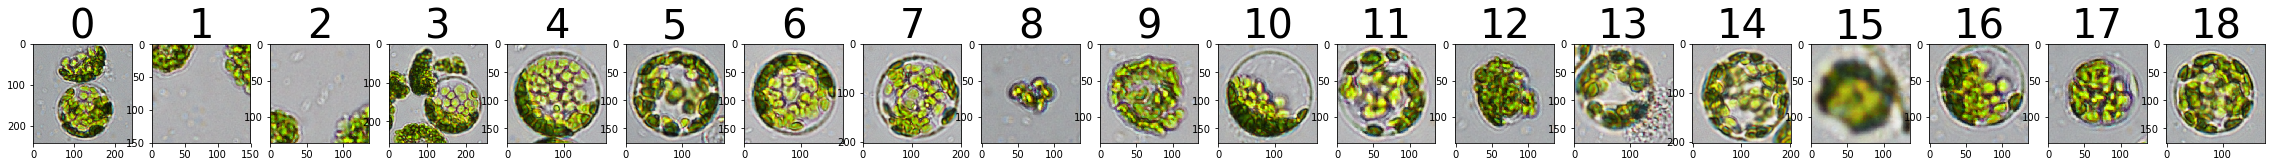

In [1103]:
n = len(rois)
ig, ax = plt.subplots(ncols = n, figsize=(40, 40))

for i in range(len(rois)):
    ax[i].imshow(rois[i], cmap='gray')
    ax[i].set_title(i, fontsize=40)

